# Prediction des émissions du dioxyde de carbone 

Objectif : Pouvez-vous prédire les émissions de carbone en Afrique en utilisant les données sur les émissions de CO2 ?
L’objectif de ce défi est de créer des modèles d’apprentissage automatique et d’apprentissage profond qui utilisent des données d’émissions de CO2 open source (provenant d’observations par satellite) pour prédire les émissions de carbone.

## importation des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import streamlit as st
import joblib, pickle, os
warnings.filterwarnings(action='ignore')
print(np.__version__)
print(pd.__version__)



2.1.3
2.2.3


In [2]:
### importation des données 

data = pd.read_csv('/home/dona-erick/Projet CO2/PredictCO2/data/Carbon_(CO2)_Emissions_by_Country.csv')
data.head(5)

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
0,Afghanistan,Asia,01-01-2011,8930.0,0.31
1,Afghanistan,Asia,01-01-2012,8080.0,0.27
2,Afghanistan,Asia,01-01-2010,7110.0,0.25
3,Afghanistan,Asia,01-01-2019,6080.0,0.16
4,Afghanistan,Asia,01-01-2018,6070.0,0.17


In [3]:
## descriptions statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Kilotons of Co2,5677.0,141229.164974,649125.822199,0.0,1380.00,9170.00,58480.00,10707219.73
Metric Tons Per Capita,5677.0,4.325505,5.503834,0.0,0.57,2.36,6.34,47.65


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677 entries, 0 to 5676
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 5677 non-null   object 
 1   Region                  5677 non-null   object 
 2   Date                    5677 non-null   object 
 3   Kilotons of Co2         5677 non-null   float64
 4   Metric Tons Per Capita  5677 non-null   float64
dtypes: float64(2), object(3)
memory usage: 221.9+ KB


In [5]:
data.isnull().sum(), data.duplicated().sum()

(Country                   0
 Region                    0
 Date                      0
 Kilotons of Co2           0
 Metric Tons Per Capita    0
 dtype: int64,
 np.int64(0))

In [6]:
### Visualisations 

### Analyse univariée

<Axes: >

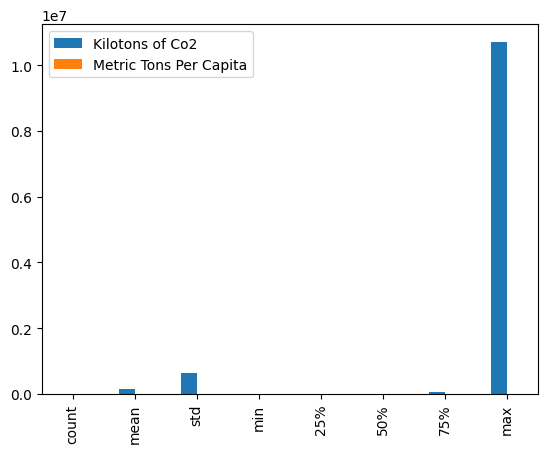

In [7]:
data.describe().plot(kind = 'bar')

In [8]:
data.columns.to_list(
    
)

['Country', 'Region', 'Date', 'Kilotons of Co2', 'Metric Tons Per Capita']

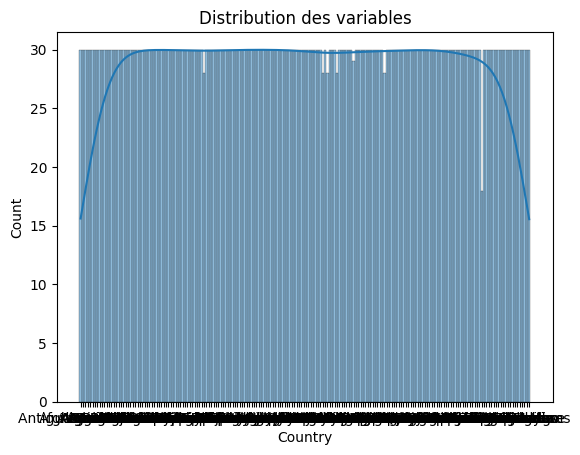

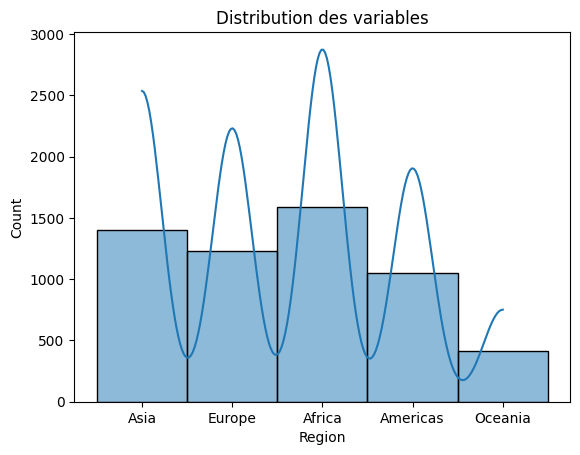

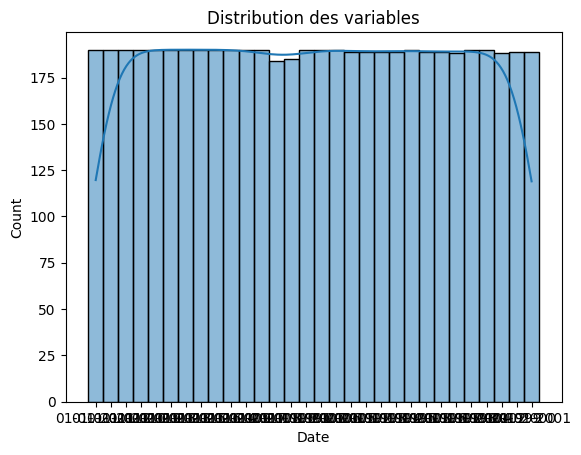

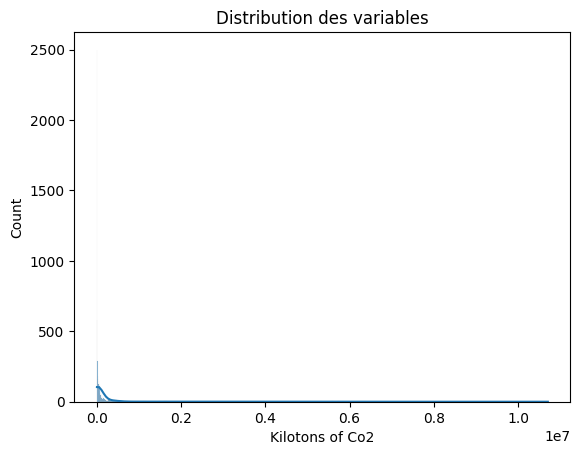

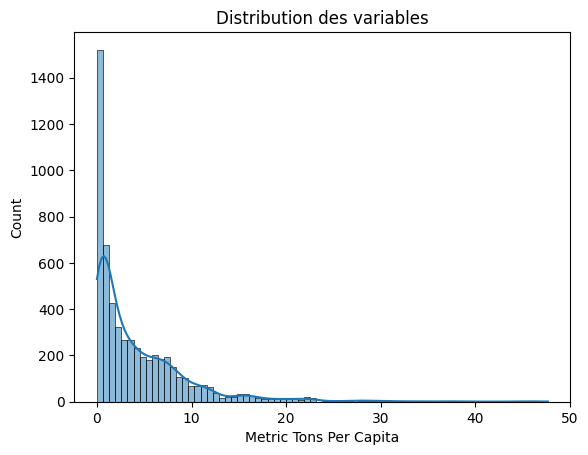

<Figure size 640x480 with 0 Axes>

In [9]:
for col in data.columns:
    sns.histplot(data = data, x = col, kde=True)
    plt.title('Distribution des variables')
    plt.show()
    plt.savefig('media')

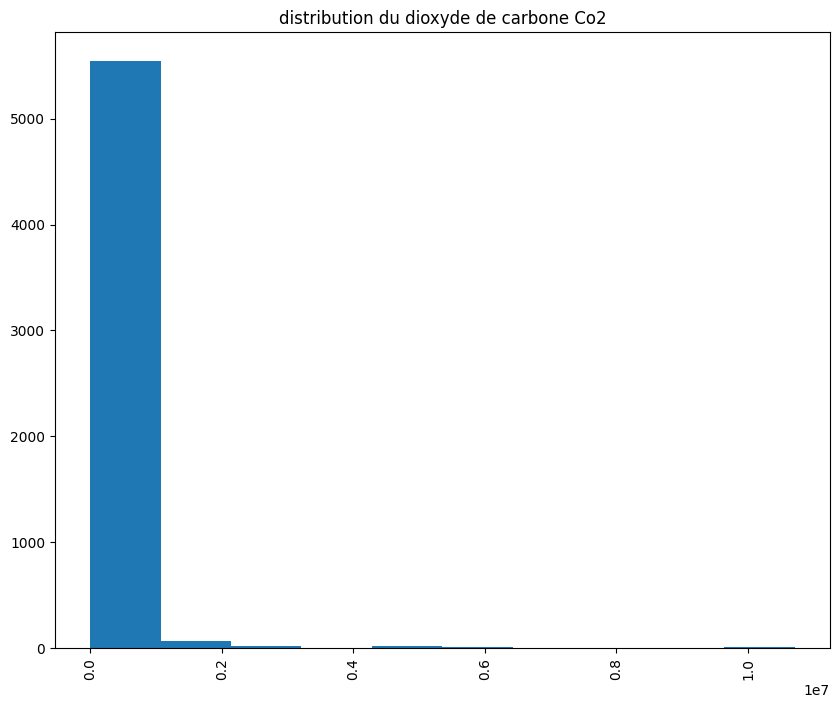

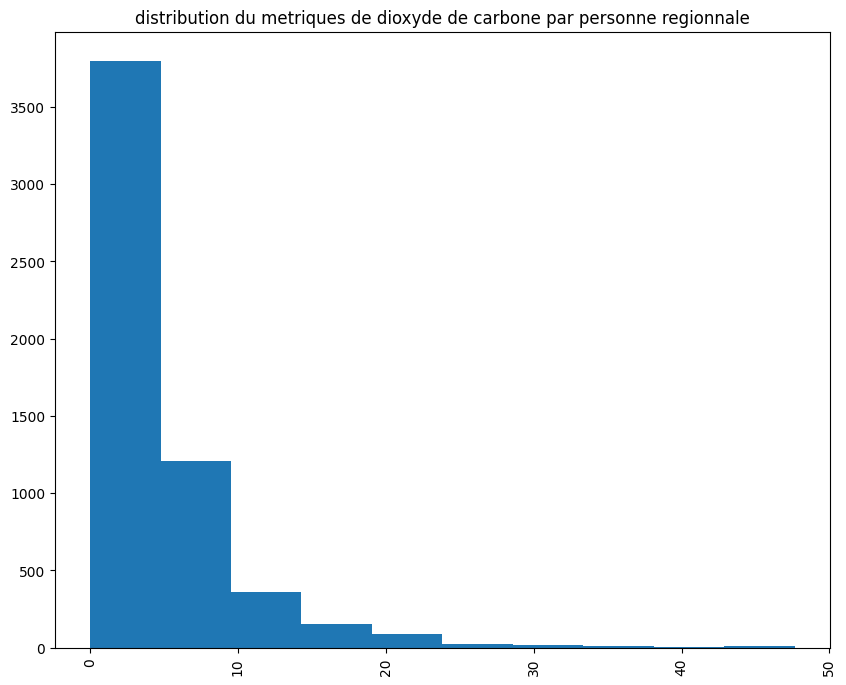

In [10]:
plt.figure(figsize=(10, 8))
plt.hist(data = data, x='Kilotons of Co2')
plt.title('distribution du dioxyde de carbone Co2')
plt.xticks(rotation = 90)
plt.show()

plt.figure(figsize=(10, 8))
plt.hist(data = data, x='Metric Tons Per Capita')
plt.title('distribution du metriques de dioxyde de carbone par personne regionnale')
plt.xticks(rotation = 90)
plt.show()

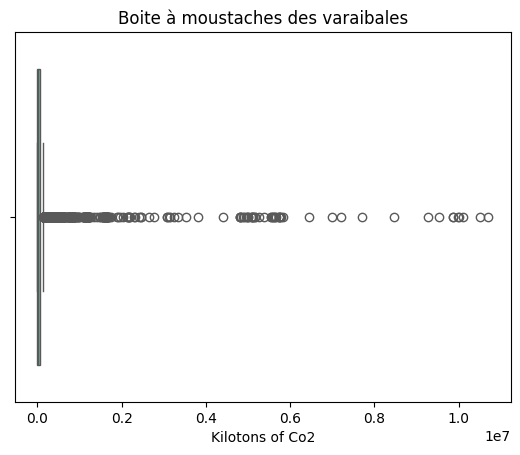

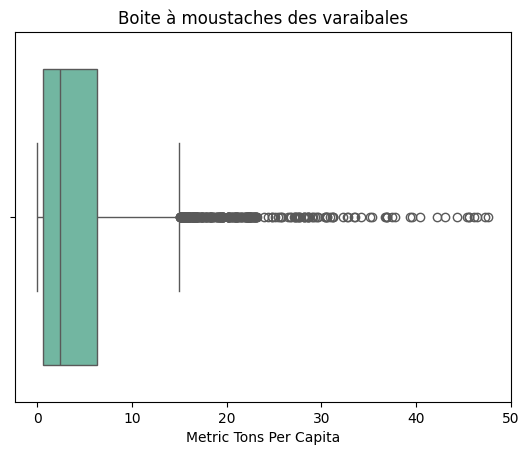

In [11]:
for col in data.select_dtypes(include= np.number).columns:
    sns.boxplot(data=data, x = col, color= 'blue', palette='Set2')
    plt.title('Boite à moustaches des varaibales')
    plt.show()

Text(0.5, 1.0, 'Carte thermiques')

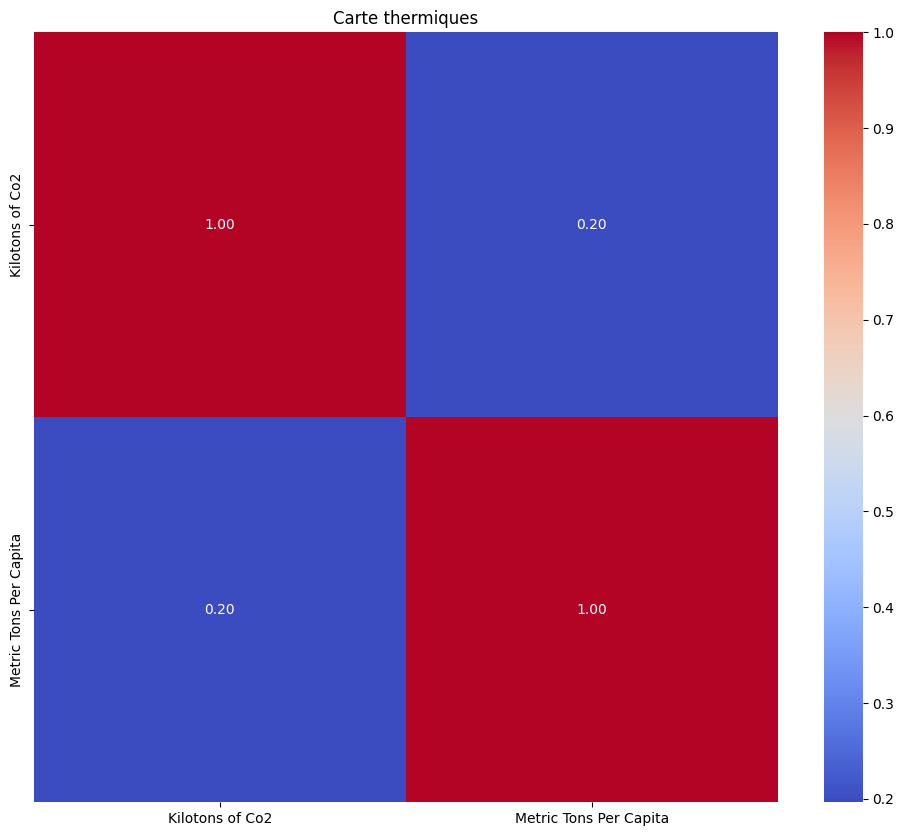

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    data.select_dtypes(exclude = 'object').corr(),
    annot=True, cmap = 'coolwarm', fmt='.2f' 
)
plt.title("Carte thermiques")

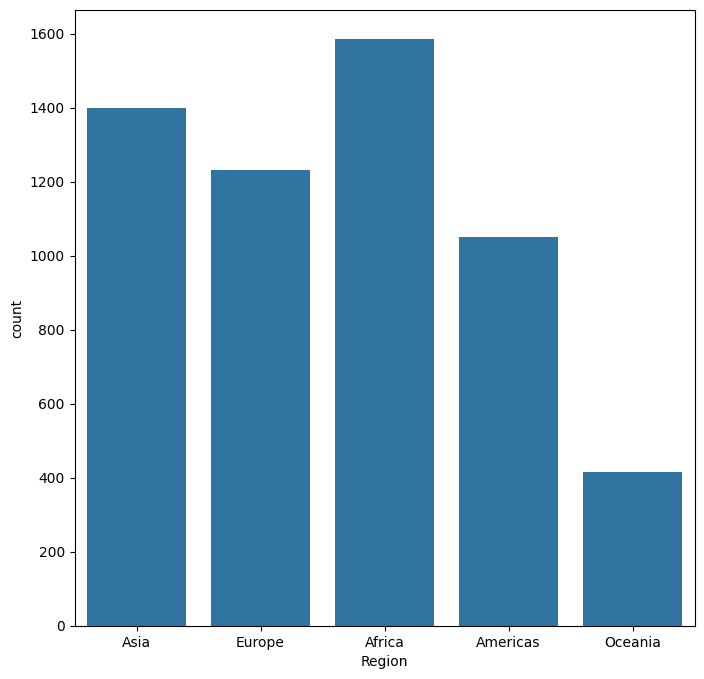

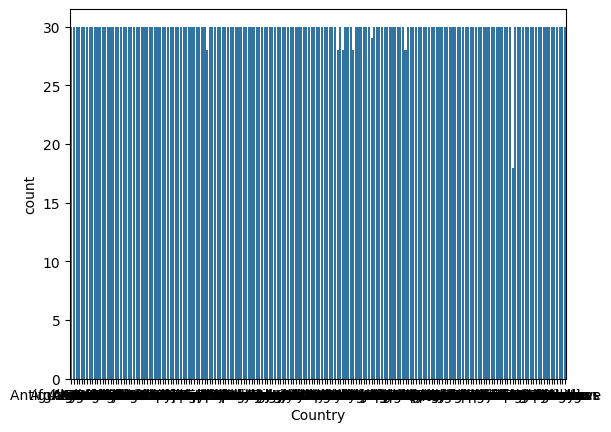

<Figure size 640x480 with 0 Axes>

In [13]:
colonnes = ['Region', "Country"]
plt.figure(figsize=(8, 8))
for var in colonnes:
    sns.countplot(data=data, x= var)
    plt.show()
    plt.savefig('')


In [14]:
### ANALYSE BIVARIÉE, MULTIVARIÉE 

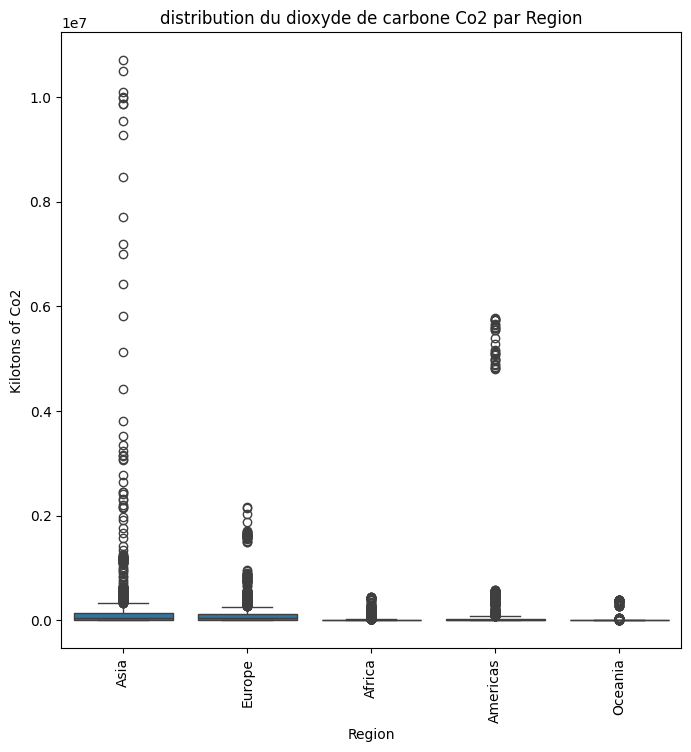

In [15]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=data, x = 'Region', y ='Kilotons of Co2')
plt.title('distribution du dioxyde de carbone Co2 par Region')
plt.xticks(rotation = 90)
plt.show()

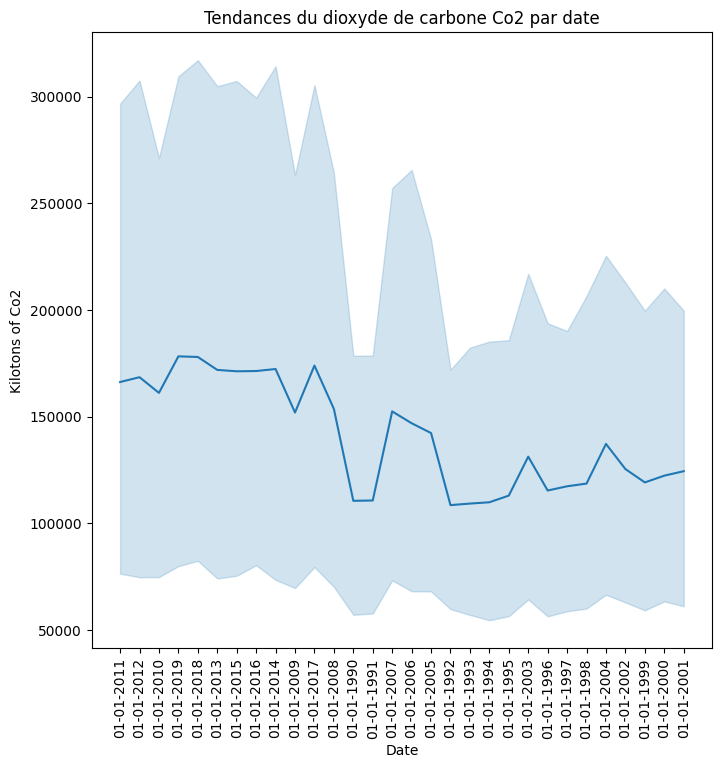

In [16]:
plt.figure(figsize=(8, 8))
sns.lineplot(data=data, x = 'Date', y ='Kilotons of Co2')
plt.title('Tendances du dioxyde de carbone Co2 par date')
plt.xticks(rotation = 90)
plt.show()

In [17]:
data['Date'] = pd.to_datetime(data['Date'], format = '%d-%m-%Y')

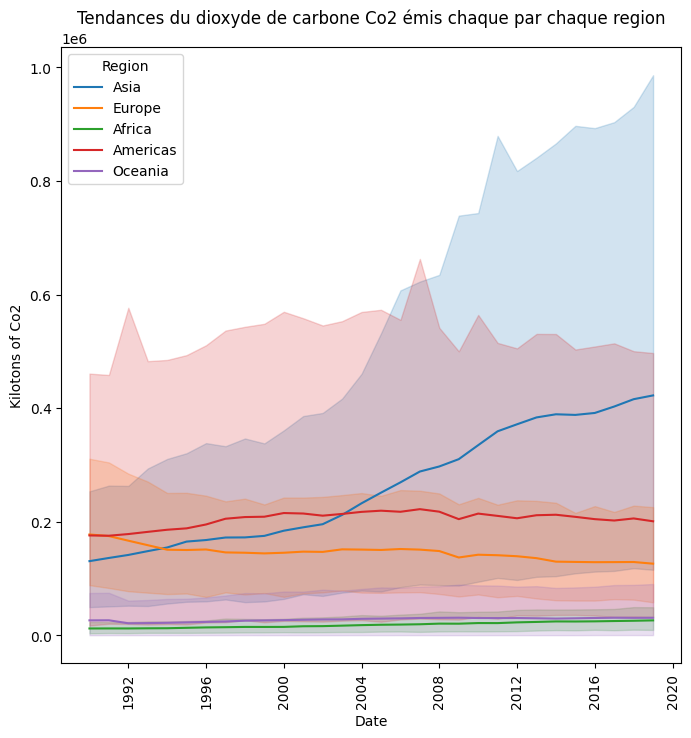

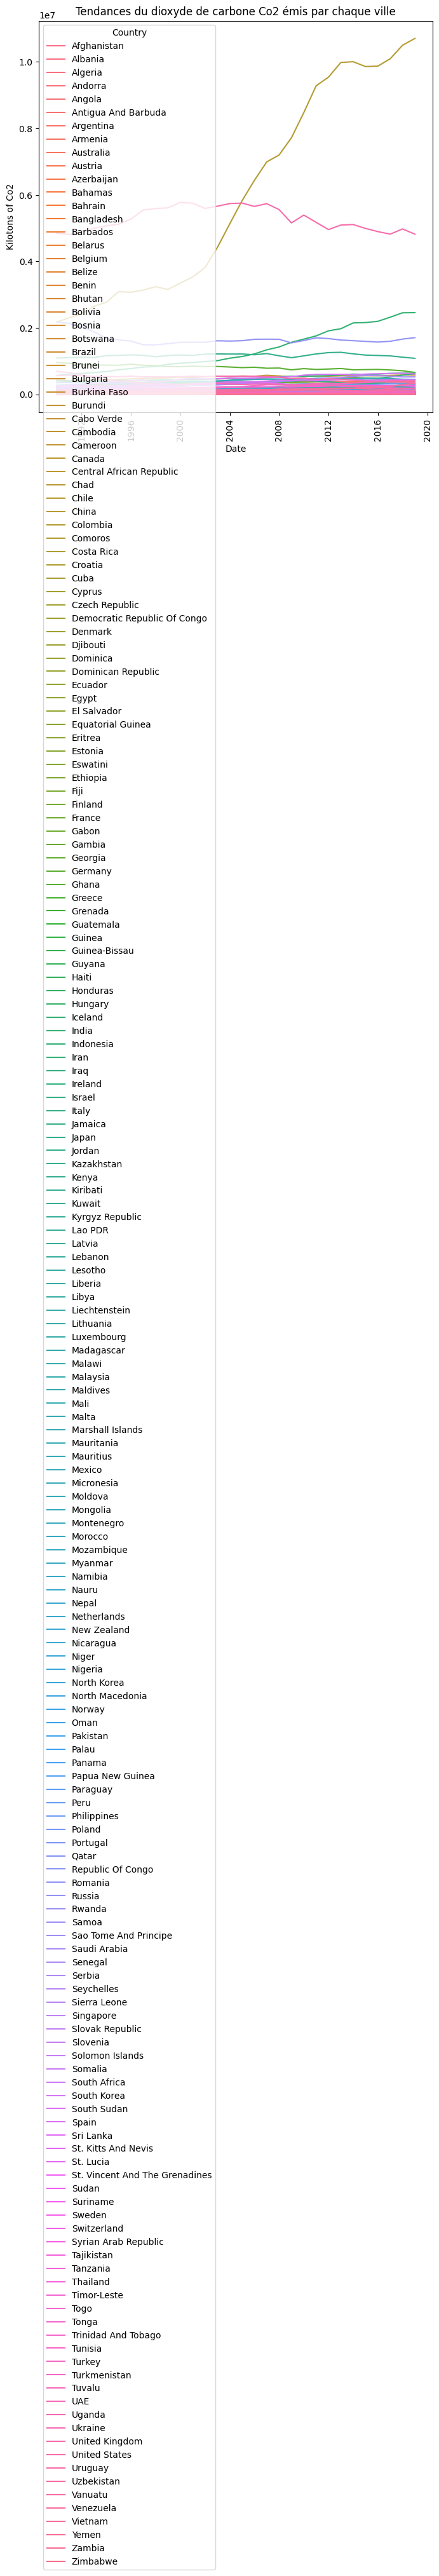

In [18]:
plt.figure(figsize=(8, 8))
sns.lineplot(data=data, x = 'Date', y ='Kilotons of Co2', hue = 'Region')
plt.title('Tendances du dioxyde de carbone Co2 émis chaque par chaque region')
plt.xticks(rotation = 90)
plt.show()

plt.figure(figsize=(8, 8))
sns.lineplot(data=data, x = 'Date', y ='Kilotons of Co2', hue="Country")
plt.title('Tendances du dioxyde de carbone Co2 émis par chaque ville')
plt.xticks(rotation = 90)
plt.show()

In [19]:
data.sample(5)

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
4867,Suriname,Americas,1990-01-01,1760.0,4.26
3475,Nauru,Oceania,1994-01-01,110.0,10.71
3783,Oman,Asia,2008-01-01,41310.0,15.58
5100,Togo,Africa,1995-01-01,980.0,0.23
172,Antigua And Barbuda,Americas,1997-01-01,290.0,4.07


<Axes: ylabel='Date'>

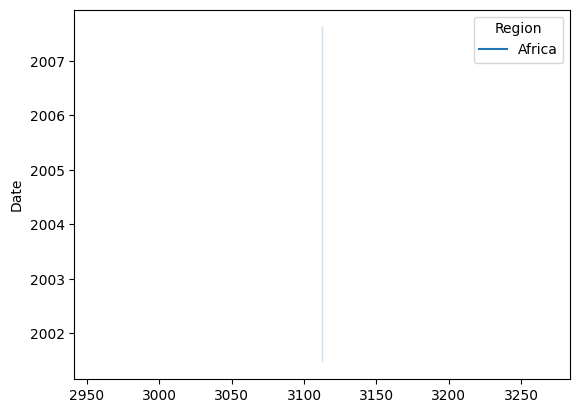

In [20]:
## quantité de dioxyde de carbone émise sur le continent africain precisement au benin de 1990 -2020

data_co2_benin = data[(data['Region']=="Africa" ) & (data['Country']=="Benin")]
data_co2_benin__mean = data_co2_benin['Kilotons of Co2'].mean()

sns.lineplot(data = data_co2_benin, x = data_co2_benin__mean, y = 'Date', hue='Region')

In [21]:
data_co2_benin.head()

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
540,Benin,Africa,2018-01-01,7420.0,0.62
541,Benin,Africa,2019-01-01,7300.0,0.59
542,Benin,Africa,2017-01-01,6870.0,0.59
543,Benin,Africa,2016-01-01,6740.0,0.60
544,Benin,Africa,2015-01-01,5510.0,0.50


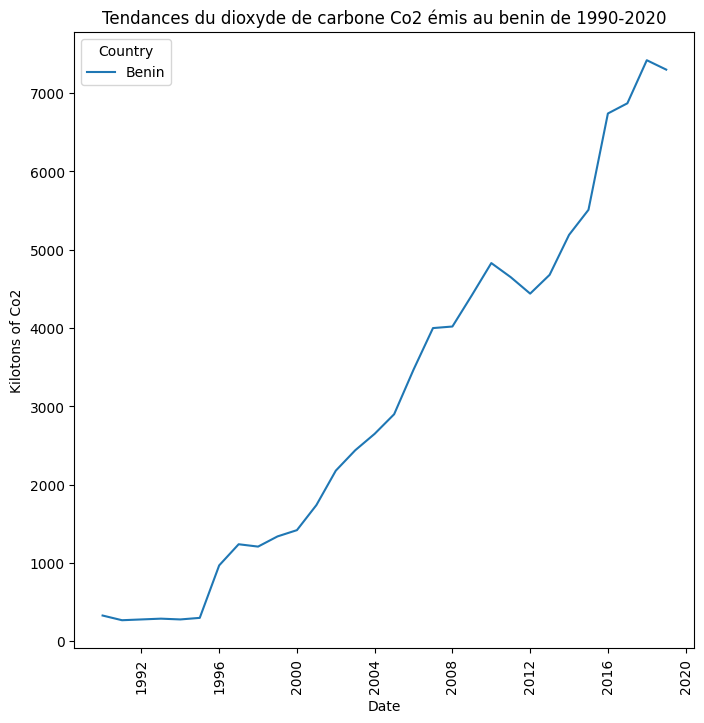

In [22]:
plt.figure(figsize=(8, 8))
sns.lineplot(data=data_co2_benin, x = 'Date', y ='Kilotons of Co2', hue="Country")
plt.title('Tendances du dioxyde de carbone Co2 émis au benin de 1990-2020')
plt.xticks(rotation = 90)
plt.show()

In [23]:
## dioxyde de carbone emis par l'afrique de 1990-2020

data_co2_africa = data[data['Region']=="Africa"]
data_co2_africa

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
60,Algeria,Africa,2019-01-01,171250.00,4.01
61,Algeria,Africa,2018-01-01,165539.99,3.95
62,Algeria,Africa,2017-01-01,158340.00,3.85
63,Algeria,Africa,2015-01-01,156270.00,3.95
64,Algeria,Africa,2016-01-01,154910.00,3.84
...,...,...,...,...,...
5672,Zimbabwe,Africa,2004-01-01,9770.00,0.80
5673,Zimbabwe,Africa,2007-01-01,9760.00,0.78
5674,Zimbabwe,Africa,2010-01-01,9600.00,0.75
5675,Zimbabwe,Africa,2009-01-01,7750.00,0.61


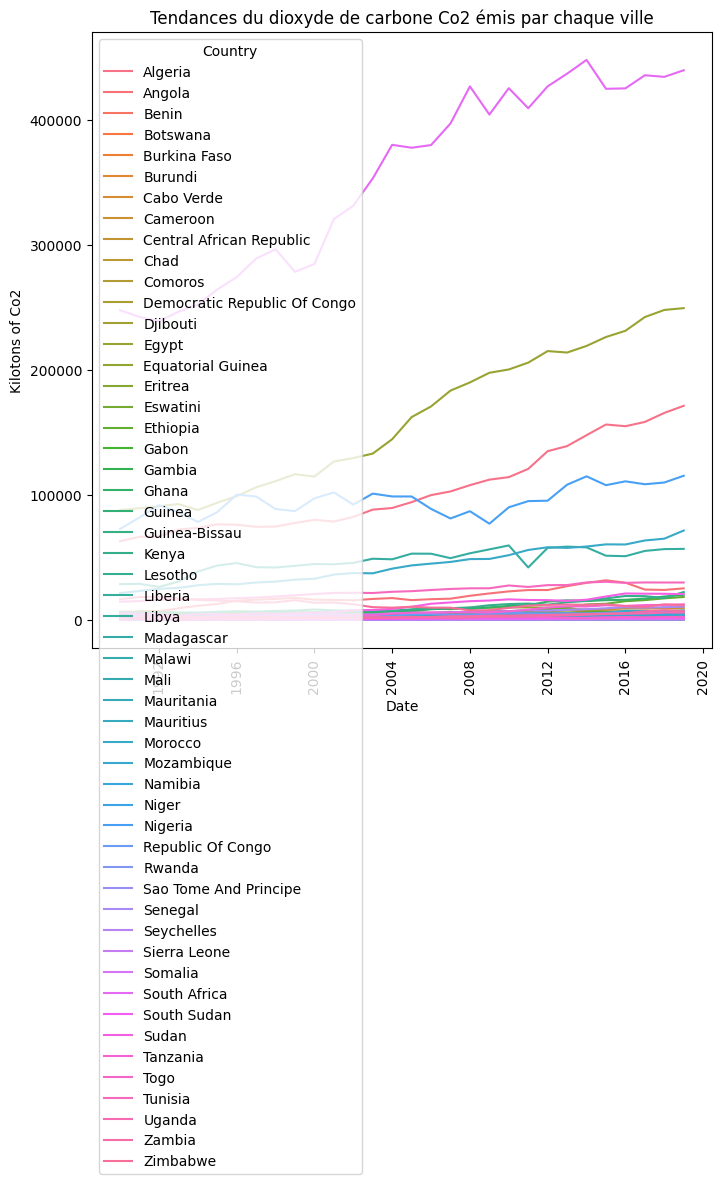

In [24]:
plt.figure(figsize=(8, 8))
sns.lineplot(data=data_co2_africa, x = 'Date', y ='Kilotons of Co2', hue="Country")
plt.title('Tendances du dioxyde de carbone Co2 émis par chaque ville')
plt.xticks(rotation = 90)
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, GammaRegressor
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline

In [26]:
### Traitement des données 
data.dtypes, data.shape

(Country                           object
 Region                            object
 Date                      datetime64[ns]
 Kilotons of Co2                  float64
 Metric Tons Per Capita           float64
 dtype: object,
 (5677, 5))

In [27]:
data.isnull().sum()

Country                   0
Region                    0
Date                      0
Kilotons of Co2           0
Metric Tons Per Capita    0
dtype: int64

In [28]:
## feature engineering date
data['Year_Kilotons_CO2'] = data['Date'].dt.year
data.head()

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita,Year_Kilotons_CO2
0,Afghanistan,Asia,2011-01-01,8930.0,0.31,2011
1,Afghanistan,Asia,2012-01-01,8080.0,0.27,2012
2,Afghanistan,Asia,2010-01-01,7110.0,0.25,2010
3,Afghanistan,Asia,2019-01-01,6080.0,0.16,2019
4,Afghanistan,Asia,2018-01-01,6070.0,0.17,2018


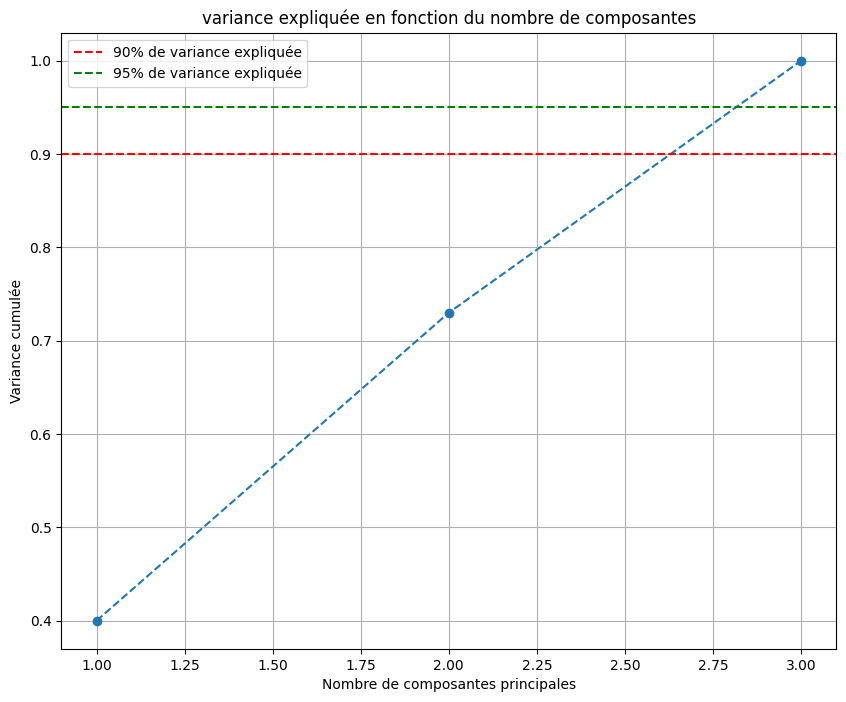

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X = data[['Kilotons of Co2', "Metric Tons Per Capita", "Year_Kilotons_CO2"]]

pca = PCA()
X_scaled = StandardScaler().fit_transform(X)
X_pca = pca.fit(X_scaled)

variance_explained = pca.explained_variance_
variance_explained_ratio = pca.explained_variance_ratio_
cumulated = np.round(np.cumsum(variance_explained_ratio), 2)

plt.figure(figsize=(10, 8))
plt.plot(range(1, len(cumulated)+1), cumulated, marker = 'o', linestyle = "--")
plt.title('variance expliquée en fonction du nombre de composantes')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance cumulée')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% de variance expliquée')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% de variance expliquée')
plt.legend(loc='best')
plt.grid()
plt.show()

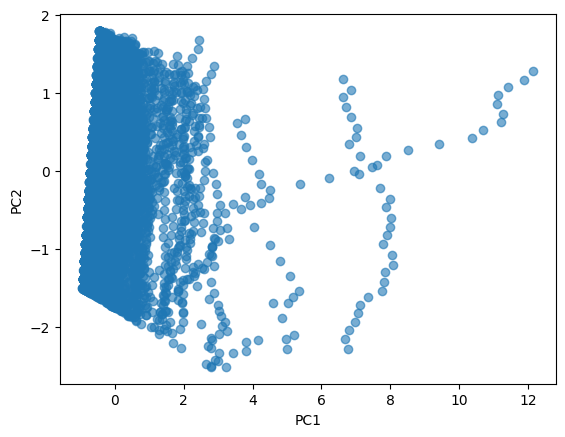

In [30]:
 ### nous choisiron n_components = 2 car elle explique environ 72% de la variance expliquée

pca = PCA(n_components=2)
X_scaled = StandardScaler().fit_transform(X)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap = 'plasma', alpha =0.6)
plt.xlabel('PC1')
plt.ylabel("PC2")
plt.show()

In [31]:
data.sample(5)

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita,Year_Kilotons_CO2
2134,Honduras,Americas,2017-01-01,9260.0,0.96,2017
3825,Pakistan,Asia,1995-01-01,82740.0,0.62,1995
3139,Marshall Islands,Oceania,1996-01-01,90.0,1.75,1996
4103,Republic Of Congo,Africa,2010-01-01,5420.0,1.22,2010
5021,Tanzania,Africa,1995-01-01,2730.0,0.09,1995


In [32]:
data['Year_Kilotons_CO2'] = data['Year_Kilotons_CO2'].astype('int64')

In [47]:
from sklearn.compose import ColumnTransformer, make_column_selector
numeric_columns = ['Metric Tons Per Capita', "Year_Kilotons_CO2"]
cat_columns = ['Region']

pipeline_numeric = Pipeline(steps=[
    ('scaler', StandardScaler())
    ]
)
pipeline_cat = Pipeline(steps=[
    ('one_hot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

pipeline_transformer = ColumnTransformer(
    transformers=[
        ('num', pipeline_numeric, numeric_columns),
        ('cat', pipeline_cat, cat_columns)
    ]
)

pipeline_transformer

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Metric Tons Per Capita',
                                  'Year_Kilotons_CO2']),
                                ('cat',
                                 Pipeline(steps=[('one_hot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Region'])])

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677 entries, 0 to 5676
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Country                 5677 non-null   object        
 1   Region                  5677 non-null   object        
 2   Date                    5677 non-null   datetime64[ns]
 3   Kilotons of Co2         5677 non-null   float64       
 4   Metric Tons Per Capita  5677 non-null   float64       
 5   Year_Kilotons_CO2       5677 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 266.2+ KB


In [49]:
X = data[['Region', "Metric Tons Per Capita", "Year_Kilotons_CO2"]]
y = data['Kilotons of Co2']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=80)

xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

#Xtrain.shape, Xtest.shape, X.shape, y.shape

((4541, 3), (1136, 3), (4541,), (1136,))

In [51]:
Xtrain = pipeline_transformer.fit_transform(xtrain)
Xtest = pipeline_transformer.transform(xtest)

In [53]:
### La modélisation ne fait pas partir des objectifs de ce petit projet

In [52]:
def modeling(estimator, x_train, x_test, y_train, y_test):
 
    estimator.fit(x_train, y_train)
    prediction = estimator.predict(x_test)
    
    mae = mean_absolute_error(y_test, prediction)
    rmse = mean_squared_error(y_test, prediction)
    R2_score = r2_score(y_test, prediction)
    
    print("******** Result  ********")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"Score: {R2_score}")



model_base = LinearRegression(fit_intercept=True)

modeling(model_base, Xtrain, Xtest, ytrain, ytest)



******** Result  ********
MAE: 198220.22925500444
RMSE: 461771820894.8122
Score: 0.05176732993305655
